# EMQQ

In this notebook we play with data from the emerging markets internet &  ecommerce etf. 

In [1]:
import os
import logging
import numpy as np
import pandas as pd
import pandas_datareader
import matplotlib.pyplot as plt
import seaborn as sns;sns.set_style("whitegrid")

from matplotlib import cm

df = pd.read_csv("data/emqq-holdings-03-28-2021.csv",
                sep=",")

df["%"] = df["% OF NET ASSET VALUES"].apply(lambda x:float(x[:-1]))
df.head()

,COMPANY NAME,TICKER,FIGI,SHARES,MARKET VALUE,% OF NET ASSET VALUES,%
0,ALIBABA GROUP HOLDING-SP ADR,BABA,BBG006G2JVL2,646008,1.438789e+08,8.30%,8.30
1,TENCENT HOLDINGS LTD,700 HK,BBG000BJ35F4,1773992,1.383764e+08,7.98%,7.98
2,MEITUAN,3690 HK,BBG00LLV9WV7,3503300,1.295990e+08,7.47%,7.47
3,JD.COM INC,JD,BBG005YHY0Q7,1394731,1.097793e+08,6.33%,6.33
4,NASPERS LTD-N SHS,NPN SJ,BBG000CTYB00,474416,1.085018e+08,6.26%,6.26


In [2]:
"$%.1f" % (df["MARKET VALUE"].sum())

'$1733768463.5'

In [3]:
df.tail()

,COMPANY NAME,TICKER,FIGI,SHARES,MARKET VALUE,% OF NET ASSET VALUES,%
93,KGINICIS CO LTD,035600 KS,BBG000PM6F03,21081,353458.35,0.02%,0.02
94,PHOENIX TREE HOLDINGS LTD,DNK,BBG00QQ109W6,179833,425664.71,0.02%,0.02
95,YUNJI INC,YJ,BBG00NPL7MC6,138161,297046.15,0.02%,0.02
96,PC HOME ONLINE INC,8044 TT,BBG000DCXLY8,123000,378355.70,0.02%,0.02
97,CASH & OTHER,NaN,NaN,8140731,8140731.57,0.47%,0.47


In [4]:
ticker = list(df.TICKER)

def _read_ticker(ticker):
    tmp = pandas_datareader.get_data_tiingo(
        ticker, api_key=os.getenv('TIINGO_API_KEY'))
    tmp = tmp.reset_index().set_index("date").rename(
            columns={"close": ticker})[[ticker]]
    return tmp

_read_ticker(ticker[0]).head()

,BABA
date,
2016-04-05 00:00:00+00:00,77.32
2016-04-06 00:00:00+00:00,78.68
2016-04-07 00:00:00+00:00,77.61
2016-04-08 00:00:00+00:00,77.47
2016-04-11 00:00:00+00:00,77.71


In [5]:
data = []
for tick in ticker:
    try:
        val = _read_ticker(tick)
        data.append(val)
    except:
        logging.warning("skipping %s" %tick)
    
len(data)

48

In [6]:
tmp = data[0]
for d in data[1:]:
    tmp = tmp.join(d)

df2 = tmp
df2.head()

,BABA,JD,PDD,MELI,NTES,BEKE,BIDU,LU,SE,CPNG,...,AFYA,LX,SY,QIWI,SOGO,DUO,QTT,BLCT,DNK,YJ
date,,,,,,,,,,,,,,,,,,,,,
2016-04-05 00:00:00+00:00,77.32,26.52,NaN,117.13,141.30,NaN,183.80,NaN,NaN,NaN,...,NaN,NaN,NaN,13.58,NaN,NaN,NaN,NaN,NaN,NaN
2016-04-06 00:00:00+00:00,78.68,26.74,NaN,119.46,144.70,NaN,186.82,NaN,NaN,NaN,...,NaN,NaN,NaN,13.96,NaN,NaN,NaN,NaN,NaN,NaN
2016-04-07 00:00:00+00:00,77.61,26.51,NaN,118.10,144.86,NaN,182.53,NaN,NaN,NaN,...,NaN,NaN,NaN,13.86,NaN,NaN,NaN,NaN,NaN,NaN
2016-04-08 00:00:00+00:00,77.47,26.86,NaN,117.85,143.25,NaN,183.98,NaN,NaN,NaN,...,NaN,NaN,NaN,13.97,NaN,NaN,NaN,NaN,NaN,NaN
2016-04-11 00:00:00+00:00,77.71,27.28,NaN,117.71,138.91,NaN,185.07,NaN,NaN,NaN,...,NaN,NaN,NaN,14.63,NaN,NaN,NaN,NaN,NaN,NaN


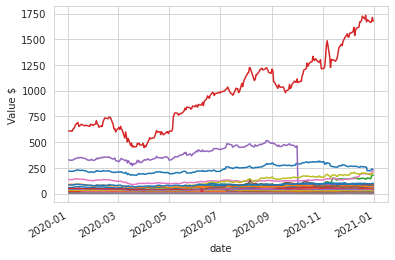

In [7]:
ax = df2.loc["2020"].plot()
plt.ylabel("Value $")
ax.get_legend().remove()

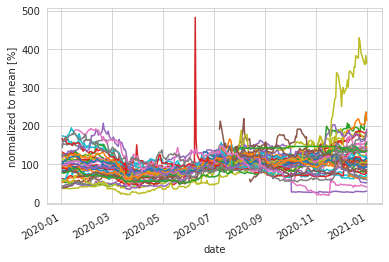

In [8]:
ax = df2.loc["2020"].apply(lambda x: x/(x.mean()/100), axis=0).plot()
plt.ylabel("normalized to mean [%]")
ax.get_legend().remove()

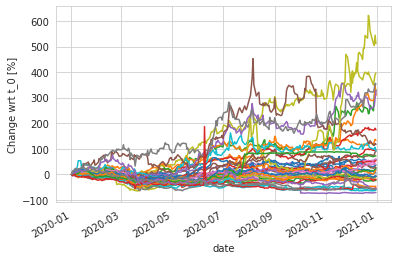

In [9]:
ax = df2.loc["2020"].apply(
    lambda x: (x - x[0])/(x[0]/100), axis=0).plot()

plt.ylabel("Change wrt t_0 [%]")
ax.get_legend().remove()

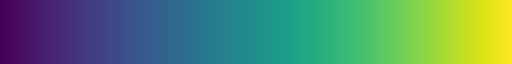

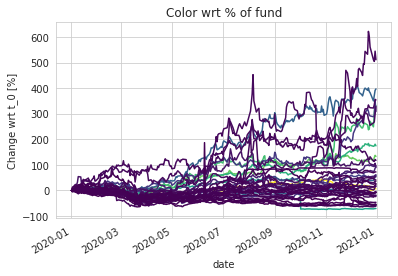

In [10]:
cmap = cm.get_cmap('viridis', (df["%"] * 100).astype(int).max())

tmp = df2.loc["2020"].apply(lambda x: (x - x[0])/(x[0]/100), axis=0)

_per = lambda x : (df.query(
    "TICKER == '%s'" %tmp.columns[x])["%"] * 100).astype(int).item()
_cmap = lambda x: cmap(_per(x))

_plot = lambda x: tmp[tmp.columns[x]].plot(color=_cmap(x))

for _ in range(len(tmp.columns)):
    _plot(_)
plt.ylabel("Change wrt t_0 [%]")
plt.title("Color wrt % of fund")
cmap

## Compare ETF wtith single stocks

Text(0, 0.5, 'Change wrt t_0 [%]')

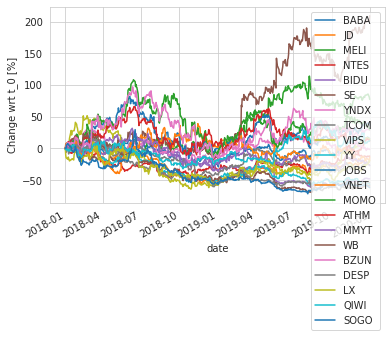

In [11]:
df3 = df2["2018":"2019"].apply(lambda x: (x - x[0])/(x[0]/100), axis=0)
df3 = df3.dropna(axis=1)
df3.plot()
plt.ylabel("Change wrt t_0 [%]")

Text(0, 0.5, 'Change wrt t_0 [%]')

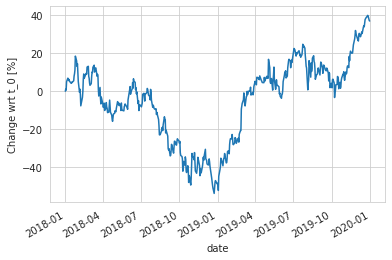

In [12]:
df4 = df3.copy()
for col in df4.columns:
    w = float(df.query("TICKER == '%s'" %col)["%"])
    df4[col] *= w
df4.mean(axis=1).plot()
plt.ylabel("Change wrt t_0 [%]")

Text(0, 0.5, 'Change wrt t_0 [%]')

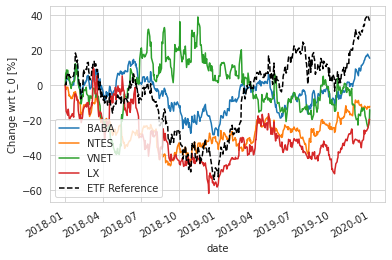

In [13]:
picks = {}
for _ in range(4):
    stockpick = df3.columns[np.random.randint(len(df3.columns))]
    tmp = df3[stockpick].plot(label=stockpick)
    picks[stockpick] = tmp

for _ in picks.keys():
    picks[_].plot(label=_)

df4.mean(axis=1).plot(label="ETF Reference", color="black", linestyle="--")


plt.legend()
plt.ylabel("Change wrt t_0 [%]")

Text(0, 0.5, 'Change wrt t_0 [%]')

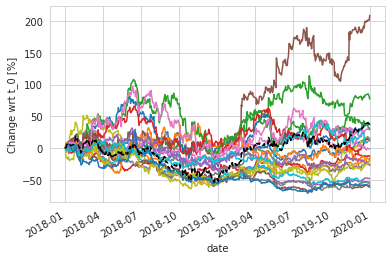

In [14]:
for _ in df3.columns:
    df3[_].plot(label=_)

ref = df4.mean(axis=1)
ref.plot(label="ETF Reference", color="black", linestyle="--")

#plt.legend()
plt.ylabel("Change wrt t_0 [%]")

In [15]:
compare = [0,0]

for _ in df3.columns:
    v = df3[_][-1]
    if v < ref[-1]:
        compare[0] += 1
    else:
        compare[1] += 1
        
compare

[19, 2]

## Compare time of investments